## Part 3 ‐ Predictive Modeling

**Background**: Ultimate is interested in predicting rider retention. To help explore this question, a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014 has been provided (ultimate_data_challenge.json). The data was pulled several months later; consider a user retained if they were “active” (i.e. took a trip) in the prceeding 30 days.

**Goal**: Use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. *NOTE: Delete the dataset when you have finished with the challenge.*

Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [1]:
# Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import numpy as np
import json

### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [2]:
# Load challenge json dataset
file = open('ultimate_data_challenge.json')
ultimate_df = pd.DataFrame(json.load(file))
file.close()
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [3]:
# Get description of each feature
ultimate_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [4]:
# Assess Dataframe
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


**Observation 1**: Most of the columns appear to be clean aside from 'avg_rating_of_driver', 'phone', and 'avg_rating_by_driver'.

*Solution*: Since it is a very small percentage of missing data, fill NaN values with the average values of the entire sample.

In [5]:
# Determine mode of string column
ultimate_df['phone'].mode()

0    iPhone
dtype: object

In [6]:
# Impute in missing values with mean / mode
ultimate_df['avg_rating_by_driver'].fillna(ultimate_df['avg_rating_by_driver'].mean(), inplace=True)
ultimate_df['avg_rating_of_driver'].fillna(ultimate_df['avg_rating_of_driver'].mean(), inplace=True)
ultimate_df['phone'].fillna(value='iPhone', inplace=True)

# Assess Dataframe
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


**Observation 2**: Columns 'signup_date' and 'last_trip_date' are numerical values in string format. 

*Solution*: Convert columns to datetime objects.

In [7]:
# Import necessary modules
from datetime import datetime

In [8]:
# Convert date strings to datetime objects
ultimate_df['signup_date'] = [datetime.strptime(x, '%Y-%m-%d') for x in ultimate_df['signup_date']]
ultimate_df['last_trip_date'] = [datetime.strptime(x, '%Y-%m-%d') for x in ultimate_df['last_trip_date']]

# Test output
ultimate_df[['signup_date','last_trip_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
signup_date       50000 non-null datetime64[ns]
last_trip_date    50000 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 781.3 KB


In [9]:
# Number of entries in the cleaned dataset
print(ultimate_df.shape)

(50000, 12)


In [10]:
# Total number of unique values within each column
print(ultimate_df.nunique())

avg_dist                  2908
avg_rating_by_driver        28
avg_rating_of_driver        38
avg_surge                  115
city                         3
last_trip_date             182
phone                        2
signup_date                 31
surge_pct                  367
trips_in_first_30_days      59
ultimate_black_user          2
weekday_pct                666
dtype: int64


**Visualization of Data**: 

The purpose of data visualization here is to simply visualize data distribution. If our model depends on a certain feature to increase retention rate, we look back at our visualizations to see if improvements could be made or not.

The most interesting feature availible for us to use is 'trips in first 30 days'. Let's see the relationship it has with other features.

In [11]:
# Import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns; sns.set(style="darkgrid")

#### Trips by City

In [12]:
# Create dataframe for trips in first 30 days grouped by city
trips_by_city = (ultimate_df[['trips_in_first_30_days', 'city']].groupby('city').sum().reset_index())
trips_by_city 

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


*Observation*: Winterfell has the most trips in the first 30 days.

Text(0.5, 1.0, 'Trips in First 30 Days by City')

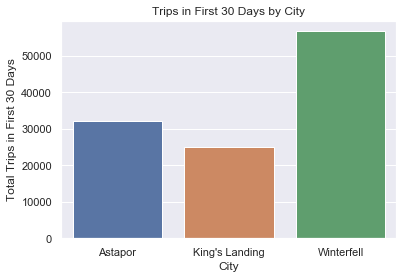

In [13]:
# Plot counts of trips in first 30 days by city 
sns.barplot(x='city', y='trips_in_first_30_days', data=trips_by_city)
plt.ylabel('Total Trips in First 30 Days')
plt.xlabel('City')
plt.title('Trips in First 30 Days by City')

#### Trips by Phone

In [14]:
# Create dataframe for trips in first 30 days grouped by phone
trips_by_phone = (ultimate_df[['trips_in_first_30_days', 'phone']].groupby('phone').sum().reset_index())
trips_by_phone

,phone,trips_in_first_30_days
0,Android,29067
1,iPhone,84843


Text(0.5, 1.0, 'Trips in First 30 Days by Phone Type')

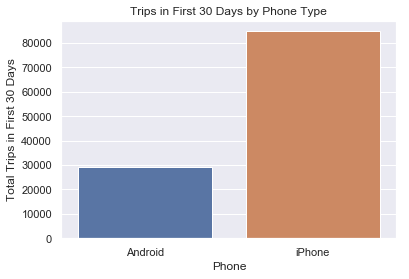

In [15]:
# Plot counts of trips in first 30 days by phone 
sns.barplot(x='phone', y='trips_in_first_30_days', data=trips_by_phone)
plt.ylabel('Total Trips in First 30 Days')
plt.xlabel('Phone')
plt.title('Trips in First 30 Days by Phone Type')

*Observations*: While the difference between the number of Android and iPhone user logins was skewed when 'iPhone' was filled in for all NaN-values in the column, iPhone is still clearly the most prevelantly used. It would be of use to check the differences between the Andriod and iPhone app versions.

#### Trips by Ultimate Black and Regular Users

In [16]:
# Create dataframe for trips in first 30 days grouped by user type
trips_by_usertype = (ultimate_df[['trips_in_first_30_days', 'ultimate_black_user']].groupby('ultimate_black_user').sum().reset_index())
trips_by_usertype

,ultimate_black_user,trips_in_first_30_days
0,False,60644
1,True,53266


In [17]:
# Relabel True/False 
trips_by_usertype['ultimate_black_user'] = ['Regular', 'Ultimate Black']
trips_by_usertype

,ultimate_black_user,trips_in_first_30_days
0,Regular,60644
1,Ultimate Black,53266


Text(0.5, 1.0, 'Trips in First 30 Days by User Type')

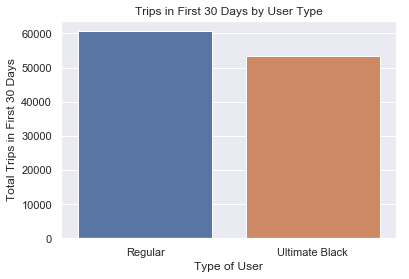

In [18]:
# Plot counts of trips in first 30 days by phone 
sns.barplot(x='ultimate_black_user', y='trips_in_first_30_days', data=trips_by_usertype)
plt.ylabel('Total Trips in First 30 Days')
plt.xlabel('Type of User')
plt.title('Trips in First 30 Days by User Type')

## Question: What fraction of the observed users were retained?

**Customer Retention**: It will be assumed that customers still using the rideshare were retained if they were still users as of the last day of record, 2014-07-01 (the latest date recorded in the last_trip_date column) or within 30 days of the last day of record, since some customers only used the service on weekends or weekdays.
*Value: 1*

**Loss of Customer**: Any last_trip_date date that was before 30 days prior to the last recorded date.
*Value: 0*

In [19]:
# Import necessary modules
from pylab import rcParams

In [20]:
# Determine last day in range
ultimate_df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [21]:
# Create variables for customer_retained and customer_lost
customers = []
customer_retained = []
customer_lost = []

for last_trip in ultimate_df['last_trip_date']:
    
    # Select customers retained 30 days prior to last day
    if datetime.strptime('2014-06', '%Y-%m')  <= last_trip <= datetime.strptime('2014-07', '%Y-%m'):
        customer_retained.append(1)
        customers.append(True)
    else:
        customer_lost.append(0)
        customers.append(False)

# Test output
#customer_retained, customer_lost, customers

In [22]:
# Add customers to ultimate_df 
ultimate_df['retained_customer'] = pd.Series(customers)
ultimate_df.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_customer
49995,5.63,4.2,5.000000,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0,True
49996,0.00,4.0,4.601559,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0,False
49997,3.86,5.0,5.000000,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0,False
49998,4.58,3.5,3.000000,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0,False
49999,3.49,5.0,4.601559,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0,False


In [23]:
# Create a general function for percent
def calculate_percentage(val, total):
    return round((val / total)*100, 3)

# Test output
print(calculate_percentage(30, 100))

30.0


In [24]:
# Calculate total retained and total lost
total_customers = len(ultimate_df['retained_customer'])
len_retained = len(customer_retained)
len_lost = len(customer_lost)
customers_list = [len_retained, len_lost]

# Calculate percentages
percent_retained = calculate_percentage(len_retained, total_customers)
percent_lost = calculate_percentage(len_lost, total_customers)

# Test output
len_retained, len_lost, percent_retained, percent_lost

(18804, 31196, 37.608, 62.392)

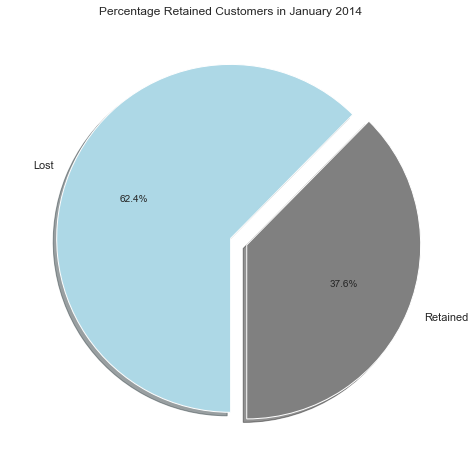

In [25]:
labels = ['Retained', 'Lost']
colors = ['grey','lightblue'] 
rcParams['figure.figsize'] = 8,8
explode = (0.1, 0) # only "explode" 'Retained'

# Plot
plt.pie(customers_list, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage Retained Customers in January 2014')
plt.savefig('customersretained.png', dpi=300)
plt.show()

*Observations*: For the sake of this analysis, the assumption was made that an active or 'retained' customer is a customer that has used the rideshare service within the 30 days prior to end of data collection. The results above show that **only 37.6% of the customers can be considered retained**, while the large majority (62.4%) were customers lost. 

### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [26]:
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_customer
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


## Data Processing:
- Drop datetime objects
- Remove *target* column: ultimate_df['Retained']
- Convert categorical values

In [27]:
# Remove datetime objects
ultimate_df = ultimate_df.drop(columns=['signup_date','last_trip_date'])

In [28]:
# Verify output
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained_customer         50000 non-null bool
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 3.5+ MB


In [29]:
# Define target and feature variables
target = ultimate_df['retained_customer']
features = ultimate_df.drop(columns='retained_customer')

#### Convert Categorical Data into Numerical Data
Categorical values are admissable in calculations, so any categorical or 'object' in the dataset must be converted into numeric ones. This can be accomplished with the Pandas function “get_dummies()” to convert categorical values to one hot encoders. 
- convert booleans
- convert strings

In [31]:
# One-hot-encode all categorical features
features_encoded = pd.get_dummies(features, columns=['city', 'phone', 'ultimate_black_user'])
features_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0,1,0


In [32]:
# One-hot-encode target variable boolean
target_encoded = pd.get_dummies(target, columns=['retained_customer'])
target_encoded.head()

,False,True
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


### Simple Neural Network: Multilayer Perceptron (MLP)
- MLPs are simplest form of neural networks, where an input is fed into the model, and using certain weights, the values are fed forward through the hidden layers to produce the output. 
- Learning comes from backpropagating through the hidden layers to change the value of the weights between each neuron. 

In [33]:
# Define model variables
X_features_encoded = features_encoded.values
y_target_encoded = target_encoded.values

#### Split Data into Training and Testing Groups
- 75% of data for training the model
- 20% of data for testing the model 

In [34]:
# Import necessary modules
from sklearn.model_selection import train_test_split

In [35]:
# Split dataset into Training Testing
X_train, X_test, y_train, y_test = train_test_split(X_features_encoded, y_target_encoded, 
                                                    test_size=0.25, random_state=42)

In [61]:
print('Shape of training set: ' + str(X_train.shape))
print('Shape of test set: ' + str(X_test.shape))

Shape of training set: (37500, 14)
Shape of test set: (12500, 14)


#### Scaling of Features for Model

In [36]:
# Import necessary modules
from sklearn.preprocessing import StandardScaler

In [37]:
# Initiate a scaler instance
sc = StandardScaler()

# Fit scaler to model featurs
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Create a MLP Simple Neural Network
- Parameters:
    - Number of layers : 4 (input, hidden1, hidden2 output)
    - Elements in layers : [14, 7, 3, 3]
    - Activation function : Rectified Linear function
    - Regularization parameter : 1

In [44]:
# Import mlp class from other notebook
%run multilayer_perceptron_mlp.ipynb as mlp

#### Creating MLP Object

In [64]:
# Creating the MLP object initialize the weights
mlp_classifier = Mlp(size_layers = [14, 7, 3, 3], 
                         act_funct   = 'relu',
                         reg_lambda  = 0,
                         bias_flag   = True)
print(mlp_classifier)

#### Training MLP Object

In [65]:
# Training with Backpropagation and 400 iterations
iterations = 400
loss = np.zeros([iterations,1])

for ix in range(iterations):
    mlp_classifier.train(X_train, y_train, 1)
    Y_hat = mlp_classifier.predict(train_X)
    y_tmp = np.argmax(Y_hat, axis=1)
    y_hat = labels[y_tmp]
    
    loss[ix] = (0.5)*np.square(y_hat - y_train).mean()

# Ploting loss vs iterations
plt.figure()
ix = np.arange(iterations)
plt.plot(ix, loss)

# Training Accuracy
Y_hat = mlp_classifier.predict(X_train)
y_tmp = np.argmax(Y_hat, axis=1)
y_hat = labels[y_tmp]

acc = np.mean(1 * (y_hat == y_train))
print('Training Accuracy: ' + str(acc*100))

ValueError: operands could not be broadcast together with shapes (37500,3) (37500,2) 

#### Testing MLP

In [ ]:
# Test Accuracy
Y_hat = mlp_classifier.predict(X_test)
y_tmp = np.argmax(Y_hat, axis=1)
y_hat = labels[y_tmp]

acc = np.mean(1 * (y_hat == y_test))
print('Testing Accuracy: ' + str(acc*100))

#### Plotting Weights

#### A. Weights from Input Layer to Hidden Layer 1

In [ ]:
w1 = mlp_classifier.theta_weights[0][:,1:]
plt.figure()
for ix_w in range(25):
    tmp = np.reshape(w1[ix_w,:], [28,28])
    ax = plt.subplot(5,5, ix_w + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(ix_w))
    plt.imshow(1- tmp, cmap='gray')

#### B. Weights from Hidden Layer 1 to Hidden Layer 2

In [ ]:
w2 =  mlp_classifier.theta_weights[1][:,1:]
plt.figure()
for ix_w in range(10):
    tmp = np.reshape(w2[ix_w,:], [5,5])
    ax = plt.subplot(2,5, ix_w + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(ix_w))
    plt.imshow(1- tmp, cmap='gray')

#### C. Weights from Hidden Layer 2 to Output Layer

In [ ]:
w3 =  mlp_classifier.theta_weights[2][:,1:]
plt.figure()
for ix_w in range(10):
    tmp = np.reshape(w3[ix_w,:], [1,10])
    ax = plt.subplot(10,1, ix_w + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(ix_w))
    plt.imshow(1- tmp, cmap='gray')

### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).